### 필수과제1
- 영화리뷰데이터 (한글)
- str 문법으로 전처리 진행해서 의미 있는 단어들만 추출하여 어떤 단어가 빈도가 가장 많은지 value_count, 시각화까지 진행 ( Top10 ~20개 정도 )
- 0, 1 label에 따라 어떤 단어의 빈도가 가장 많은지 그리고 둘의 차이가 있는지 확인해 주시면 됩니다.
- 필수는 : 코드와 주석처리 ( 시각화하는 코드, 전처리 코드 필수적으로 들어가야 한다! )

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [3]:
movie_df = pd.read_csv('movie_rv.csv')

In [4]:
movie_df

,Unnamed: 0,id,document,label
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,149996,8549745,평점이 너무 낮아서...,1
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [8]:
movie_df.isnull().sum()

Unnamed: 0    0
id            0
document      5
label         0
dtype: int64

In [10]:
movie_df = movie_df.dropna()
movie_df.isnull().sum()

Unnamed: 0    0
id            0
document      0
label         0
dtype: int64

In [13]:
# 0과 1만 존재하는 라벨임을 확인
movie_df['label'].value_counts()

label
0    75170
1    74825
Name: count, dtype: int64

In [14]:
# label에 따라 데이터셋을 분류해준다.
movie_0 = movie_df[movie_df['label'] == 0]
movie_1 = movie_df[movie_df['label'] == 1]

In [18]:
import re

def text_preprocessing(text):
    # 첫 번째 패턴: 영문자와 숫자 제거
    pattern = '[a-zA-Z0-9]'
    text = re.sub(pattern, '', text)
    # ex) 'Hello World' -> ''
    
    # 두 번째 패턴: 한글 자음과 모음(완성된 글자가 아닌 경우) 제거
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'
    text = re.sub(pattern, '', text)
    # ex) 'ㅎㅔㄹㄹㅗ' -> ''
    
    # 세 번째 패턴: 알파벳, 숫자, 공백을 제외한 모든 특수문자 제거
    pattern = '[^\w\s]'
    text = re.sub(pattern, '', text)
    # ex) 'Hello, World!' -> 'Hello World'
    
    return text

### label == 0인 경우 분석

In [45]:
movie_review_0 = tuple(movie_0['document'])
movie_review_0 = [text_preprocessing(review) for review in movie_review_0]
movie_review_0

['아 더빙 진짜 짜증나네요 목소리',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 솔직히 재미는 없다평점 조정',
 '막 걸음마 뗀 세부터 초등학교 학년생인 살용영화별반개도 아까움',
 '원작의 긴장감을 제대로 살려내지못했다',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫겟다 납치감금만반복반복이드라마는 가족도없다 연기못하는사람만모엿네',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '재미없다 지루하고 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남바베트의 만찬은 이야기도 있고 음식 보는재미도 있는데  이건 볼게없다 음식도 별로 안나오고 핀란드 풍경이라도 구경할랫는데 그것도 별로 안나옴 ',
 '주제는 좋은데 중반부터 지루하다',
 '다 짤랐을꺼야 그래서 납득할 수 없었던거야 그럴꺼야 꼭 그랬던걸꺼야',
 '카밀라벨 발연기',
 '졸쓰레기 진부하고말도안됌 아시간아까워',
 '라도 기대했던 내가 죄인입니다 죄인입니다',
 '키이라 나이틀리가 연기하고자 했던건 대체 정신장애일까 틱장애일까',
 '포스터는 있어보이는데 관객은 명이네',
 '다 알바생인가 내용도 없고 무서운거도 없고 웃긴거도 하나도 없음 완전 별싱거운 영화내시간 넘 아까움   완전 낚임',
 '평점에속지마시길시간낭비 돈낭비임',
 '리얼리티가 뛰어나긴 한데 큰 공감은 안간다 이민기캐릭터는 정신의학상 분노조절장애 초기 증상일거다 툭하면 사람패고 욕하고 물건 파손하고 조금 오바였음 극 초반엔 신선했는데 가면 갈수록 이민기 정신상태 공감불가',
 '마이너스는 왜없냐  뮤비 보고 영화수준 딱 알만하더군  북한에서 이런거 만들라고 돈 대주던',
 '난 우리영화를 사랑합니다',
 '야 세르게이 작은고추의 매운맛을 보여주마 포퐁저그 콩진호가 간다'

In [46]:
from konlpy.tag import Okt # 형태소 분석기
okt = Okt()
tokens = [okt.morphs(review) for review in movie_review_0] # 주어진 리뷰 텍스트를 형태소 단위로 분리하여 리스트로 반환
tokens[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['너', '무재', '밓었', '다그', '래서', '보는것을', '추천', '한', '다'],
 ['교도소', '이야기', '구먼', '솔직히', '재미', '는', '없다', '평점', '조정'],
 ['막',
  '걸음',
  '마',
  '뗀',
  '세',
  '부터',
  '초등학교',
  '학년',
  '생인',
  '살용',
  '영화',
  '별',
  '반개',
  '도',
  '아까',
  '움'],
 ['원작', '의', '긴장감', '을', '제대로', '살려내지못', '했다']]

In [47]:
# 불용어를 설정해주자.
stop_words = '영화'

preprocessing = []
for token in tokens:
    for word in token:
        if word not in stop_words:
            preprocessing.append(word)
    
preprocessing

['아',
 '더빙',
 '진짜',
 '짜증나네요',
 '목소리',
 '너',
 '무재',
 '밓었',
 '다그',
 '래서',
 '보는것을',
 '추천',
 '한',
 '다',
 '교도소',
 '이야기',
 '구먼',
 '솔직히',
 '재미',
 '는',
 '없다',
 '평점',
 '조정',
 '막',
 '걸음',
 '마',
 '뗀',
 '세',
 '부터',
 '초등학교',
 '학년',
 '생인',
 '살용',
 '별',
 '반개',
 '도',
 '아까',
 '움',
 '원작',
 '의',
 '긴장감',
 '을',
 '제대로',
 '살려내지못',
 '했다',
 '별',
 '반개',
 '도',
 '아깝다',
 '욕',
 '나온다',
 '이응경',
 '길용우',
 '연',
 '기',
 '생활',
 '이',
 '몇',
 '년',
 '인지',
 '정말',
 '발',
 '로',
 '해도',
 '그것',
 '보단',
 '낫겟다',
 '납치',
 '감금',
 '만',
 '반복',
 '반복',
 '이',
 '드라마',
 '는',
 '가족',
 '도',
 '없다',
 '연기',
 '못',
 '하는',
 '사람',
 '만',
 '모',
 '엿',
 '네',
 '울면',
 '서',
 '손',
 '들',
 '고',
 '횡단보도',
 '건널',
 '때',
 '뛰',
 '쳐나',
 '올',
 '뻔',
 '이범수',
 '연기',
 '드럽게',
 '못',
 '해',
 '취향',
 '은',
 '존중',
 '한',
 '다지',
 '만',
 '진짜',
 '내생',
 '에',
 '극장',
 '에서',
 '본',
 '중',
 '가장',
 '노잼',
 '노',
 '감동',
 '임',
 '스토리',
 '도',
 '어거지',
 '고',
 '감동',
 '도',
 '어거지',
 '굿바이',
 '레닌',
 '표절',
 '인',
 '것',
 '은',
 '이해',
 '하는데',
 '왜',
 '뒤',
 '로',
 '갈수록',
 '재미',
 '없어지냐',
 '재미없다',
 '지루하고',
 '같은',
 '음식',


In [48]:
# 한 글자를 초과하는 단어만 포함시키자.
preprocessing = [token for token in preprocessing if len(token) > 1]

In [49]:
# 상위 15개의 단어를 수치와 함께 출력
from collections import Counter

word_count = Counter(preprocessing)
most_count = pd.Series(preprocessing).value_counts().head(15)
most_count

너무     4861
진짜     4324
으로     4187
평점     3634
스토리    3475
쓰레기    3365
정말     3286
에서     3282
이런     3223
그냥     2989
감독     2823
시간     2798
연기     2699
내용     2642
하고     2523
Name: count, dtype: int64

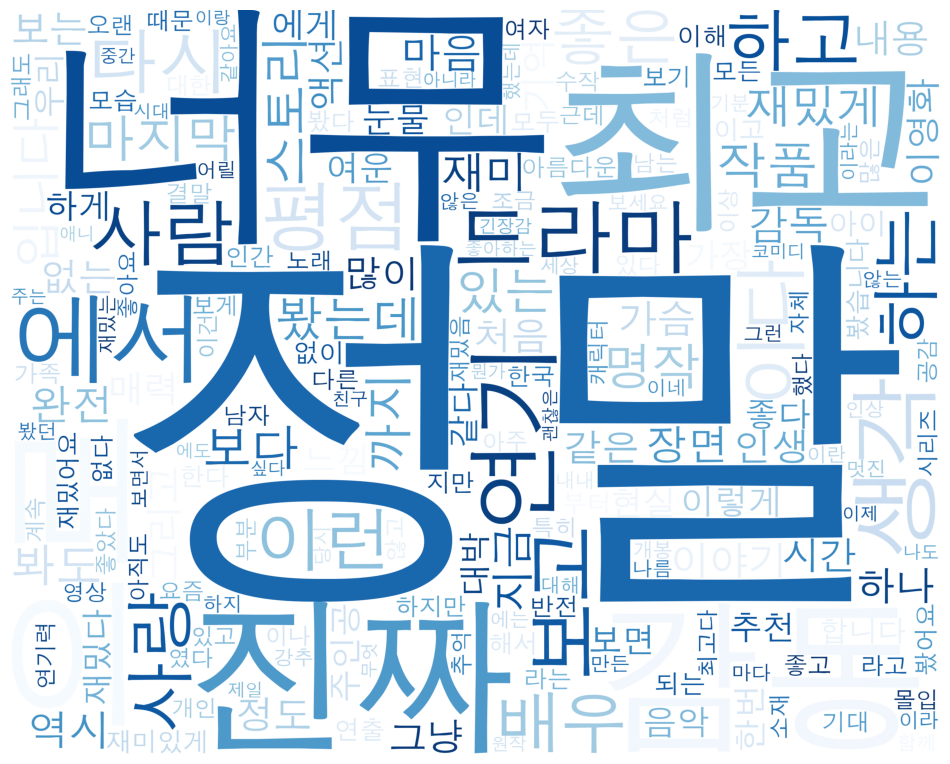

In [61]:
# 시각화를 해보자.
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(background_color='white', colormap='Blues', width=2500, height=2000, random_state=1,
               collocations=False, stopwords = STOPWORDS,
               font_path='/Library/Fonts/AppleGothic.ttf')
wc = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis("off")
plt.show()

- 쓰레기, 노잼, 아깝다, 최악이라는 단어를 비롯하여 부정적인 용어가 많다.
- 즉, label 0은 대체적으로 부정적인 평가가 많다고 생각할 수 있다.

### label == 1인 경우 분석

In [51]:
movie_review_1 = tuple(movie_1['document'])
movie_review_1 = [text_preprocessing(review) for review in movie_review_1]
movie_review_1

['흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나',
 '사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나',
 '걍인피니트가짱이다진짜짱이다',
 '볼때마다 눈물나서 죽겠다년대의 향수자극허진호는 감성절제멜로의 달인이다',
 '담백하고 깔끔해서 좋다 신문기사로만 보다 보면 자꾸 잊어버린다 그들도 사람이었다는 것을',
 '냥 매번 긴장되고 재밋음',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다그냥 까고싶어서 안달난것처럼 보인다',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드',
 '약탈자를 위한 변명 이라 저놈들은 착한놈들 절대 아닌걸요',
 '나름 심오한 뜻도 있는 듯 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '절대 평범한 영화가 아닌 수작이라는걸 말씀드립니다',
 ' 고추를 털어버려야 할텐데',
 '재밋는뎅',
 '센스있는 연출력탁월한 캐스팅년대의 향수 그래서 점',
 '엄포스의 위력을 다시 한번 깨닫게 해준 적남 꽃검사님도 연기 정말 좋았어요 완전 명품드라마',
 '재밌는데 별점이 왜이리 낮은고',
 '아직도 이 드라마는 내인생의 최고',
 '패션에 대한 열정 안나 윈투어',
 '허허원작가 정신나간 유령이라 재미있겠네요',
 '이 영화가 왜 이렇게 저평가 받는지 모르겠다',
 '단순하면서 은은한 매력의 영화',
 '오게두어라 서리한이 굶주렸다',
 '정말 맘에 들어요 그래서 또 보고싶은데 또 보는 방법이 없네  ',
 '윤제문이라는 멋진 배우를 발견하게 됐어요 소소한 일탈이 잔잔한 미소를 머금게 합니다 음악은 조금 아쉽네요 점 주고 싶은데 평점 올리고 싶어 점 줄게요',
 '데너리스 타르 가르엔나도 용의주인이 되고 싶다누이랑근친상간이나 하고 다닐지

In [52]:
from konlpy.tag import Okt # 형태소 분석기
okt = Okt()
tokens = [okt.morphs(review) for review in movie_review_1] # 주어진 리뷰 텍스트를 형태소 단위로 분리하여 리스트로 반환
tokens[:5]

[['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍지', '않구나'],
 ['사이',
  '몬페',
  '그',
  '의',
  '익살스런',
  '연기',
  '가',
  '돋보였던',
  '영화',
  '스파이더맨',
  '에서',
  '늙어',
  '보이기만',
  '했던',
  '커스틴',
  '던스트',
  '가',
  '너무나도',
  '이뻐',
  '보였다'],
 ['액션', '이', '없는데도', '재미', '있는', '몇', '안되는', '영화'],
 ['왜케',
  '평점',
  '이',
  '낮은건데',
  '꽤',
  '볼',
  '만',
  '한',
  '데',
  '헐리우드',
  '식',
  '화려함에만',
  '너무',
  '길들여져',
  '있나'],
 ['걍', '인피니트', '가', '짱', '이다', '진짜', '짱', '이다']]

In [53]:
# 불용어를 설정해주자.
stop_words = '영화'

preprocessing = []
for token in tokens:
    for word in token:
        if word not in stop_words:
            preprocessing.append(word)
    
preprocessing

['흠',
 '포스터',
 '보고',
 '초딩',
 '줄',
 '오버',
 '연기',
 '조차',
 '가볍지',
 '않구나',
 '사이',
 '몬페',
 '그',
 '의',
 '익살스런',
 '연기',
 '가',
 '돋보였던',
 '스파이더맨',
 '에서',
 '늙어',
 '보이기만',
 '했던',
 '커스틴',
 '던스트',
 '가',
 '너무나도',
 '이뻐',
 '보였다',
 '액션',
 '이',
 '없는데도',
 '재미',
 '있는',
 '몇',
 '안되는',
 '왜케',
 '평점',
 '이',
 '낮은건데',
 '꽤',
 '볼',
 '만',
 '한',
 '데',
 '헐리우드',
 '식',
 '화려함에만',
 '너무',
 '길들여져',
 '있나',
 '걍',
 '인피니트',
 '가',
 '짱',
 '이다',
 '진짜',
 '짱',
 '이다',
 '볼때',
 '마다',
 '눈물나서',
 '죽겠다',
 '년대',
 '의',
 '향수',
 '자',
 '극',
 '허진호',
 '는',
 '감성',
 '절제',
 '멜로',
 '의',
 '달인',
 '이다',
 '담백하고',
 '깔끔해서',
 '좋다',
 '신',
 '문',
 '기',
 '사',
 '로만',
 '보다',
 '보면',
 '자꾸',
 '잊어버린다',
 '그',
 '들',
 '도',
 '사람',
 '이었다는',
 '것',
 '을',
 '냥',
 '매번',
 '긴장',
 '되고',
 '재밋음',
 '참',
 '사람',
 '들',
 '웃긴게',
 '바스코',
 '가',
 '이기',
 '면',
 '락스',
 '코',
 '라고',
 '까고',
 '바비',
 '가',
 '이기',
 '면',
 '아이돌',
 '이라고',
 '깐',
 '다그',
 '냥',
 '까고싶어서',
 '안달',
 '난',
 '것',
 '처럼',
 '보인다',
 '이건',
 '정말',
 '깨알',
 '캐스팅',
 '과',
 '질퍽',
 '하',
 '지',
 '않은',
 '산뜻한',
 '내',
 '용구성',
 '이',
 '잘',
 '버무러진',

In [54]:
# 한 글자를 초과하는 단어만 포함시키자.
preprocessing = [token for token in preprocessing if len(token) > 1]

In [55]:
# 상위 15개의 단어를 수치와 함께 출력
from collections import Counter

word_count = Counter(preprocessing)
most_count = pd.Series(preprocessing).value_counts().head(15)
most_count

정말     6466
너무     6289
최고     5572
진짜     4012
감동     3861
으로     3753
에서     3700
연기     3629
생각     3330
드라마    3025
보고     2773
평점     2681
이다     2615
사람     2431
다시     2338
Name: count, dtype: int64

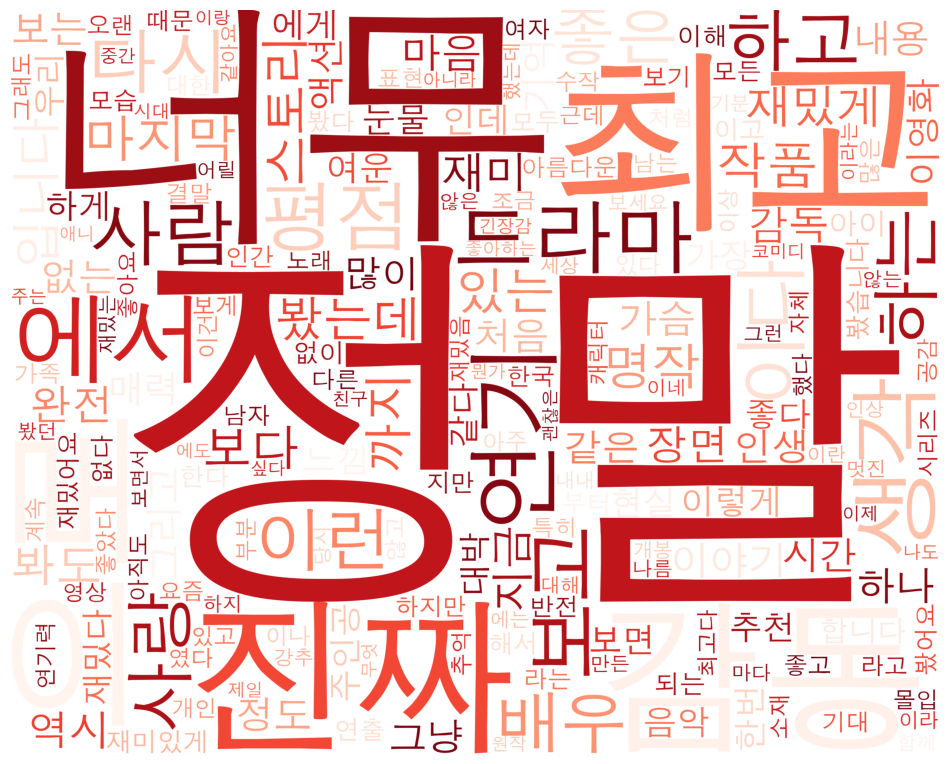

In [60]:
# 시각화를 해보자.
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(background_color='white', colormap='Reds', width=2500, height=2000, random_state=1,
               collocations=False, stopwords = STOPWORDS,
               font_path='/Library/Fonts/AppleGothic.ttf')
wc = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis("off")
plt.show()

- 최고, 감동, 재밌다라는 단어를 비롯하여 긍정적인 용어가 많다.
- 즉, label 1은 대체적으로 긍정적인 평가가 많다고 생각할 수 있다.